In [7]:
# Create particles that are self propelled and move with the vicek model in 3D space.
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
from scipy import spatial
from matplotlib import cm

In [8]:
# Vicek perameters:
r = 20 #radius around particle 
noise = 0.05 # noise in the system 
v=20 #velocity m/s
n = 6

In [9]:
# Initialisation of the problem

data_mat = np.zeros((6,n)) #positions of each particle shape(3,n) for 2D simulation.
data_mat[0,:] = np.random.normal(0,1,size=n) #x position set to match real birds data.
data_mat[1,:] = np.random.normal(0,1, size=n) #y position
data_mat[2,:] = np.random.normal(0,1, size=n) #z position
data_mat[3,:] = np.deg2rad(np.random.normal(50,55,size=n)) #theta
data_mat[4,:] = np.deg2rad(np.random.normal(0,5,size=n)) #alpha
data_mat[5,:] = np.ones(n) #velocities

def vicek_step(data_mat):
    # create distance adjacency matrix for each particle
    points = np.c_[data_mat[0,:],data_mat[1,:],data_mat[1,:]]
    tree = spatial.cKDTree(points)

    for i in range(len(data_mat)):
        point_i = data_mat[0:3,i]
        neibors = tree.query_ball_point(point_i, r) #the index of the neibors in the radius r 
        neibors = neibors.append(i) # include the particle of interest also
        new_theta = np.mean(data_mat[3,neibors]) + np.random.normal(0,noise) #get new angle as the mean of the neigbors anlges + the noise   
        new_alpha = np.mean(data_mat[4,neibors]) + np.random.normal(0,noise) #get new angle as the mean of the neigbors anlges + the noise   
        # update angles
        data_mat[3,i] = new_theta
        data_mat[4,i] = new_alpha

    # weird effect that if 0 and 360 mean they make 180 which is not correct..is this effect strange/need to be accounted for?
    # fix this then try to train GNN to redescover the rules? how woul dit?.... what would be the messages passed...? need to think...

    data_mat[0,:] = data_mat[0,:] + v*np.cos(data_mat[3,:])*np.sin(data_mat[4,:]) #update X coords
    data_mat[1,:] = data_mat[1,:] + v*np.sin(data_mat[3,:])*np.sin(data_mat[4,:]) #update Y coords
    data_mat[2,:] = data_mat[2,:] + v*np.cos(data_mat[4,:]) #update Z coords

    # normalise data , create velocity and acceelrations coordiantes. 

    return data_mat

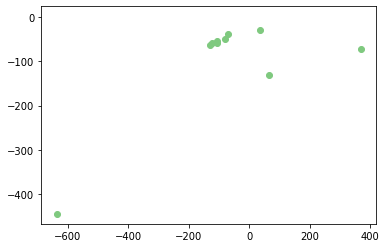

In [10]:
fig = plt.figure()
camera = Camera(fig)
colors = cm.get_cmap('Accent')

for j in range(500):
    data_mat = vicek_step(data_mat)
    plt.scatter(data_mat[0,:],data_mat[1,:],color=colors(0))
    # plt.xlim(-60,60)
    # plt.ylim(-60,60)

    camera.snap()
    
from IPython.display import HTML
HTML(camera.animate().to_jshtml())

# animation = camera.animate()
# animation.save('../animations/vicsek.gif')

In [11]:
# make some hierarchy and make the angles align more with higher hierarchy birds... to keep the flock together. 
# Make the speeds get adjusted?

# make 1000 of these with shape as expected with the simulation and see if its in some way learnable.. maybe the noise?.